# Нейронные сети

До этого момента мы с вами обсуждали алгоритмы классического машинного обучения. Сегодня мы поговорим о том, как машинное обучение выходит за рамки классических моделей и превращается в Deep Learning посредством формирования принципиально нового класса моделей - нейронных сетей.

# Что делает линейная регрессия?

Вспомним, что такое линейная регрессия. Это модель, формирующая веса для каждого признака, описывающего некоторый объект для того, чтобы сделать разумное предсказание некоторой его характеристики.

Эти веса в некотором  смысле можно рассматривать как важность данного признака для принятия окончательного решения. Рассмотрим классический пример:

Пусть перед нами стоит задача оценки стоимости дома по описанию некоторых его характеристик. Скажем, эти признаки:

* число комнат,
* число ванных комнат,
* средний балл учеников в школах в округе (эту характеристику можно рассмаривать как оценку качества этих школ),
* процент озеленения территории района,
* станция метро,
* средняя стоимость жилья в районе.


Обычная линейная регрессия пытается сделать свое предсказание, основываясь на этих базовых признаках, данных нам. Но ведь некоторые комбинации этих признаков могут сказать нам намного больше, чем базовые признаки. Например: если мы знаем, сколько в доме комнат и сколько ванных, мы можем сказать, насколько он будет удобен для большой семьи. По информации о среднем балле в школах и проценте озеленения территории можно сделать вывод об удобстве данного района для воспитания детей. По станции метро и средней стоимости жилья можно узнать, насколько элитен район, в котором находится дом.

При помощи такого подхода мы можем сгенерировать признаковое описание **более высокого уровня**. Такие признаки лучше описывают наши объекты, как бы выделяя наиболее необходимую информацию из исходного описания. Как же можно эти признаки добыть?

Пусть нам нужно получить M признаков высокого уровня по N признакам низкого. Добиться этого можно при помощи обучения индивидуальной линейной регрессии для предсказания каждого из M высокоуровневых признаков. Из полученных признаков можно создавать признаки все более и более высокого уровня, пока мы наконец не решим остановиться и обучить линейную регрессию, возвращающую нам итоговый ответ.



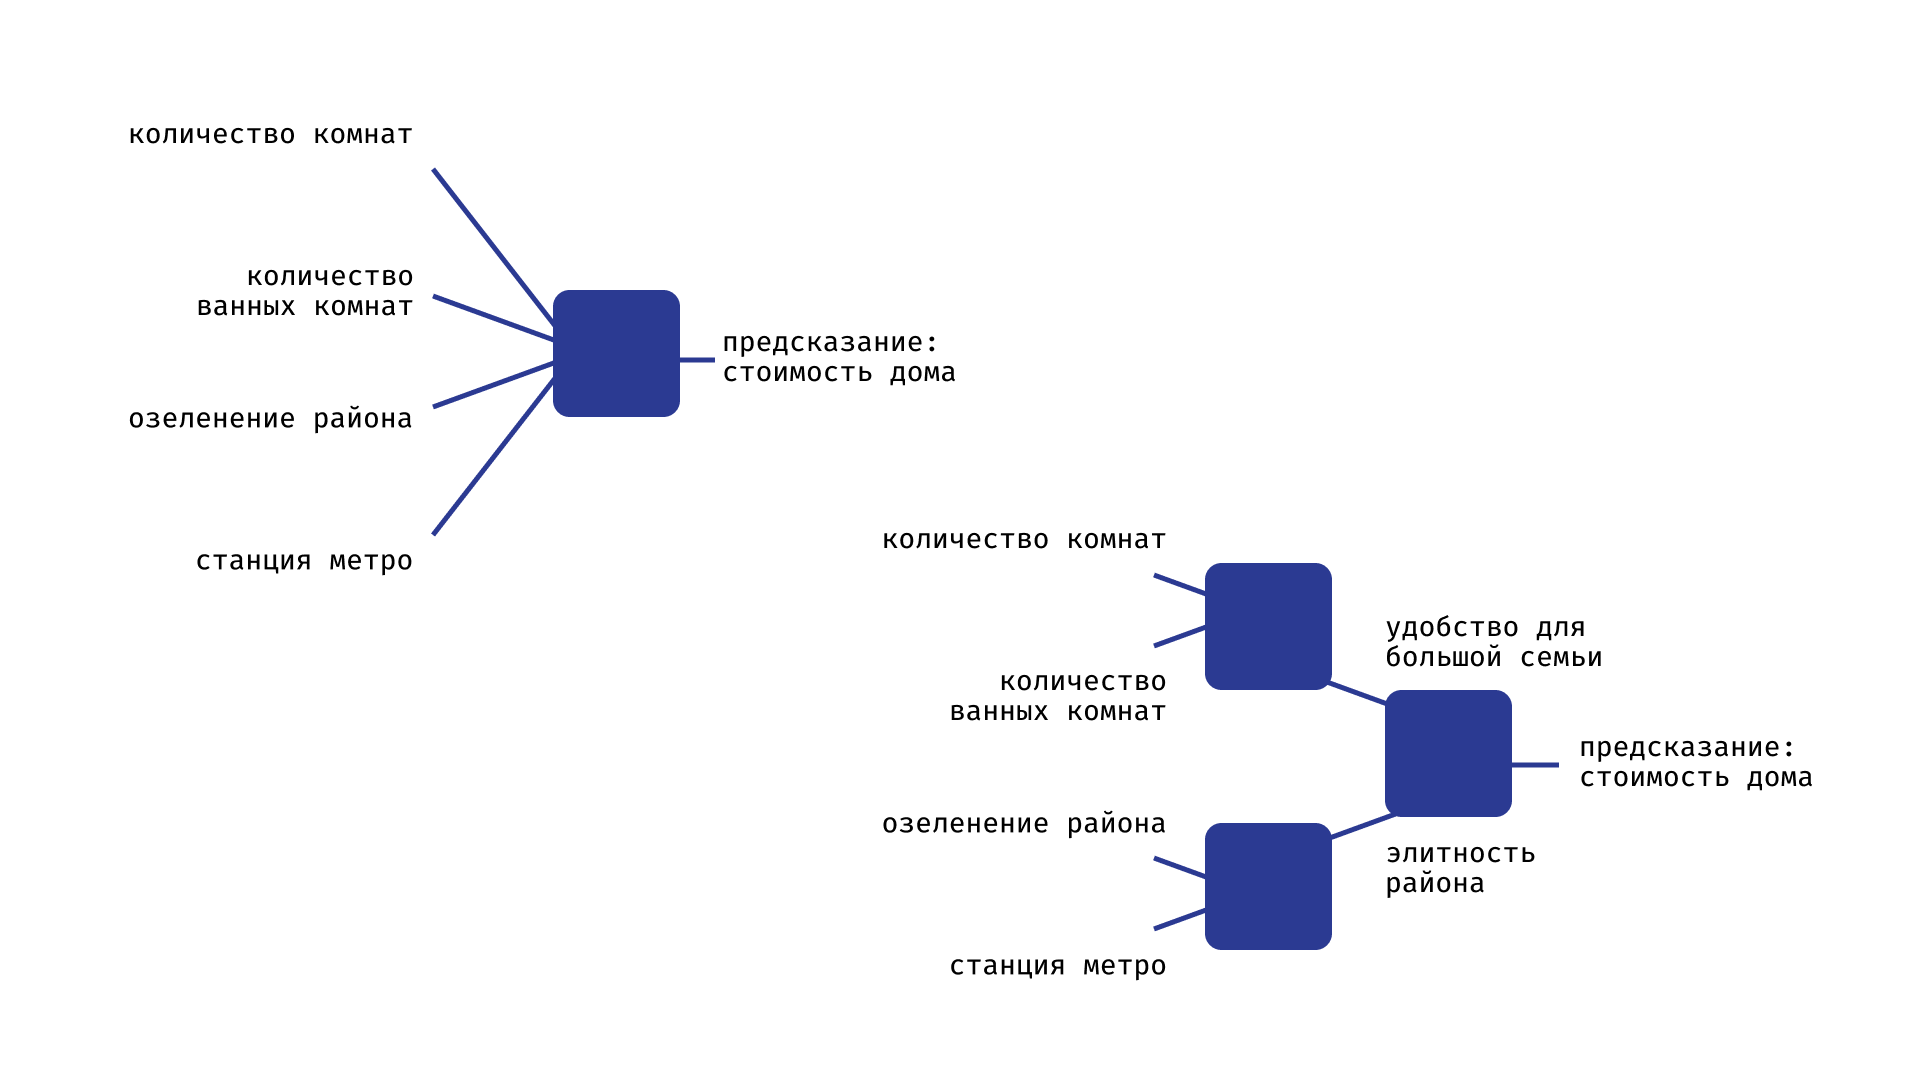

# Перцептрон Розенблатта

В 50-х годах XX века американский ученый Френк Розенблатт работал над математической моделью распознавания визуальных образов человеком.


В результате своих исследований Розенблатт пришел к следующим выводам:

* Распознавание объектов строится при помощи возбуждения некоторой комбинации сенсоров, которое в дальнейшем передается по нейронам.

* Нейрон представляет собой клетку, которая может находиться в одном из двух состояний: возбуждения и спокойствия. У нейрона есть N входных каналов, по которым к нейрону может передаться возбуждение, и один выходной канал, по которому нейрон может передать импульс дальше, на вход другим нейронам. Возбужденный нейрон передает импульс, спокойный - нет.

* Возбуждение нейрона достигается в том случае, если суммарный заряд, пришедший по входным каналам, превышает некоторый порог

* Нейроны связаны друг с другом в 3 слоя: первый слой - сенсорный, он принимает возбуждение отдельных рецепторов, пришедшее из окружающей среды. Второй - скрытый, функционирует по указанному механизму. Третий слой - распознающий. Он состоит из N нейронов, каждый из которых может быть либо возбужден, либо спокоен. Каждый из нейронов отвечает некоторому образу, а факт возбуждения




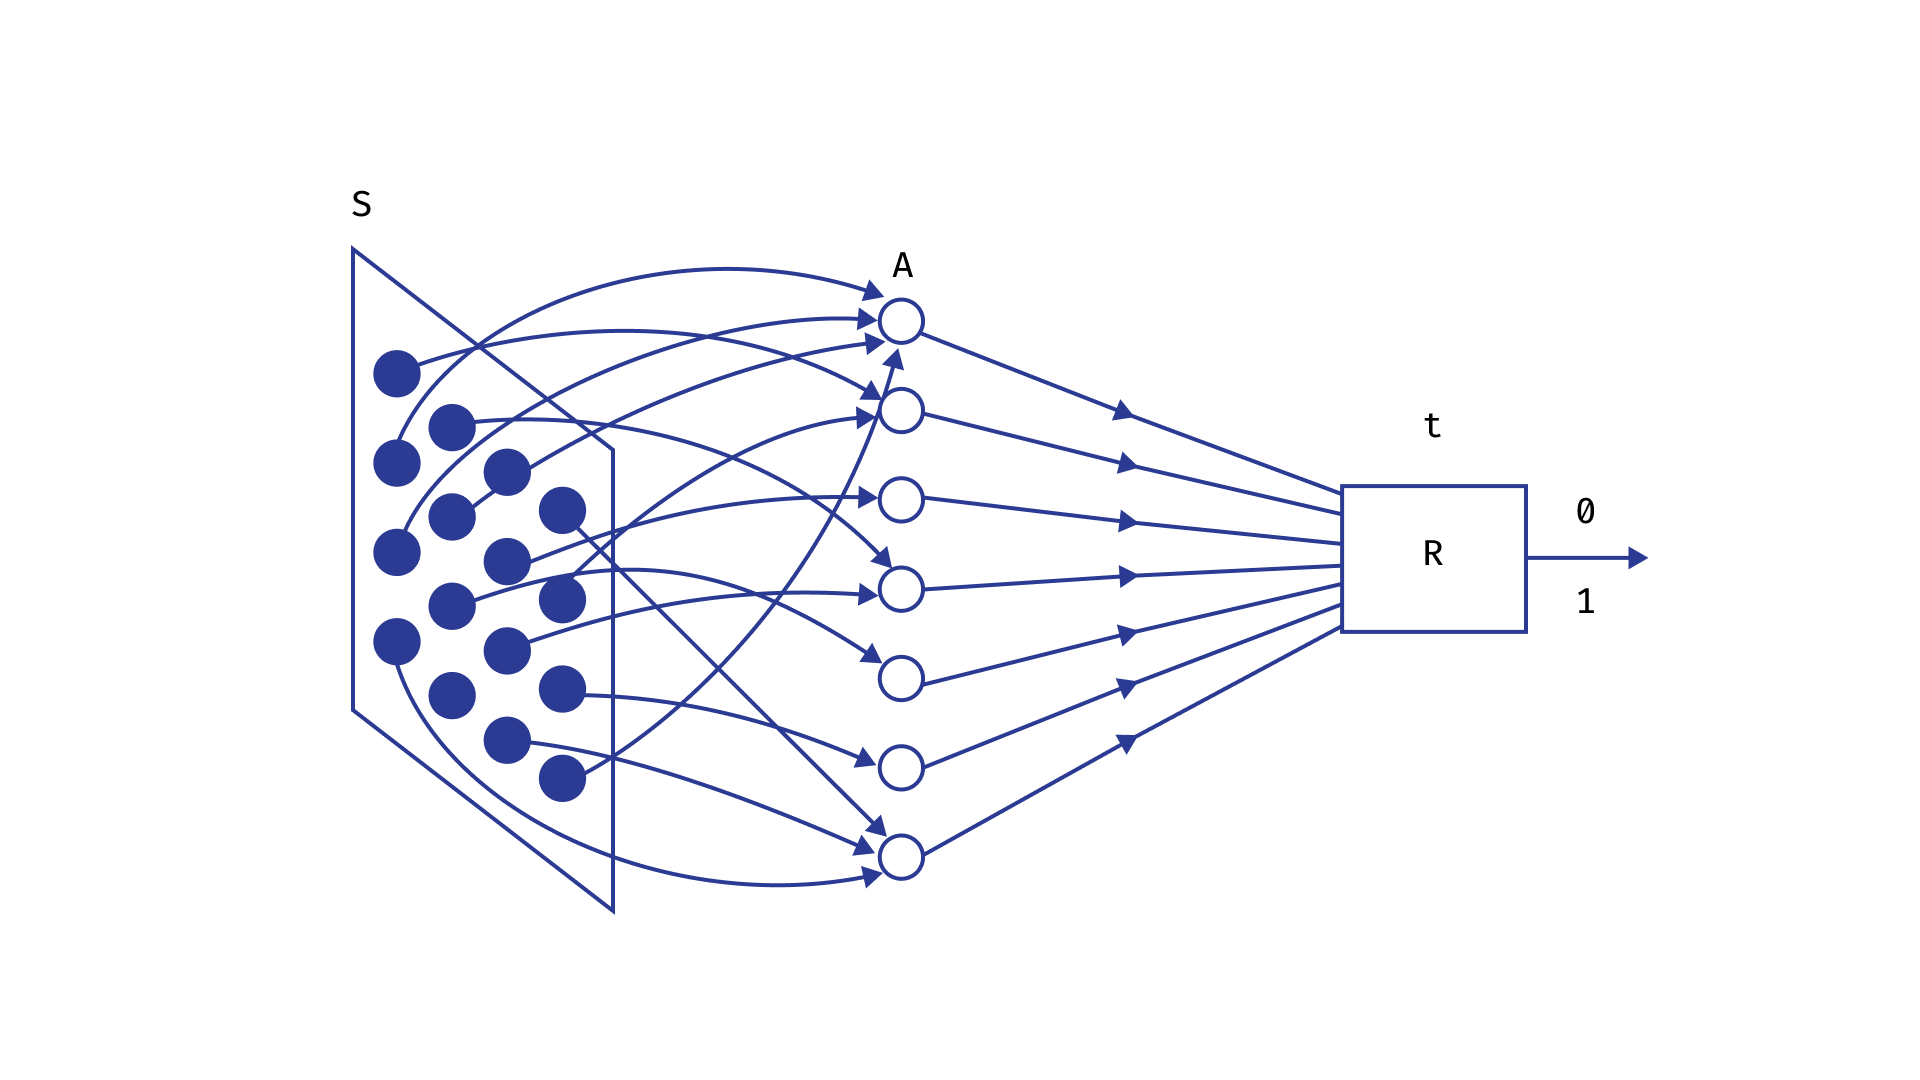

__________________________________________
Работа одного нейрона в этой парадигме очень напоминает функционирование линейной регрессии с некоторым уточнением.

Пусть $λ_i$ - это сигнал, пришедший на i-й входной канал нашего нейрона. Тогда выходной сигнал определяется как output($\vec{λ}$) = [∑$λ_i$ > β], где β - пороговое значение **активации** данного нейрона (то есть порог заряда, начиная с которого нейрон переходит в состояние возбуждения).

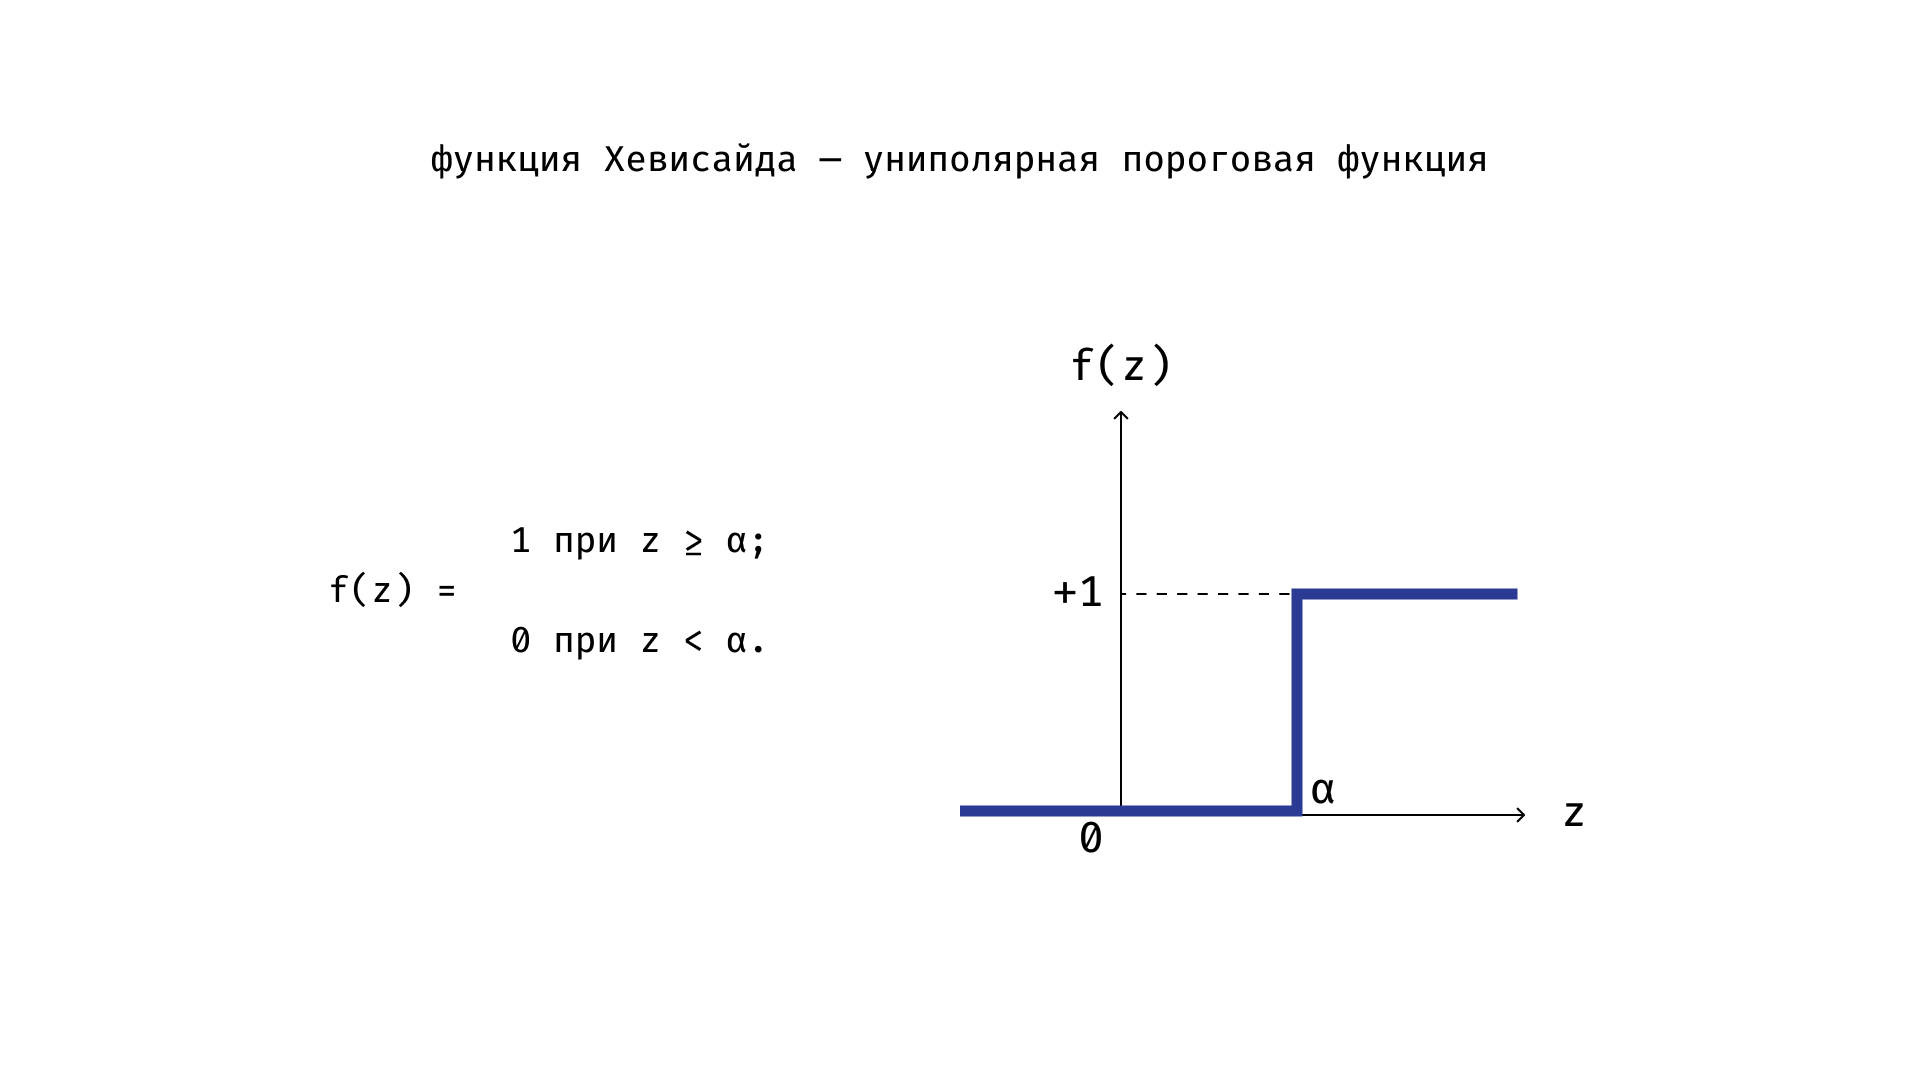



Заметим две детали, отвечающие нашему восприятию физики данного процесса.

Во-первых, каждый входной и выходной канал каждого нейрона, вероятно, обладает своим собственным сопротивлением, влияющим на передаваемый по каналу импульс. Смоделировать этот процесс мы можем при помощи введения **весов** для каждого из входных импулльсов. То есть output($\vec{λ}$) = [∑$w_iλ_i$ > β], где $w_i$ - это вес, характеризующий сопротивление i-го входного канала



Во-вторых, вряд ли настоящие нейроны действительно так категоричны в распространении электрического импульса, что имеют всего 2 состояния: 0 и 1. Скорее всего, нейрон всегда передает некий импульс на следующие слои, просто этот импульс сильно зависит от указанной входной суммы импульсов. График этой выходной функции скорее всего довольно сильно должен быть похож на пороговую функцию. Возможно, кто-то из вас уже догадался, что хорошим примером такой функции может служить известная нам сигмоида.



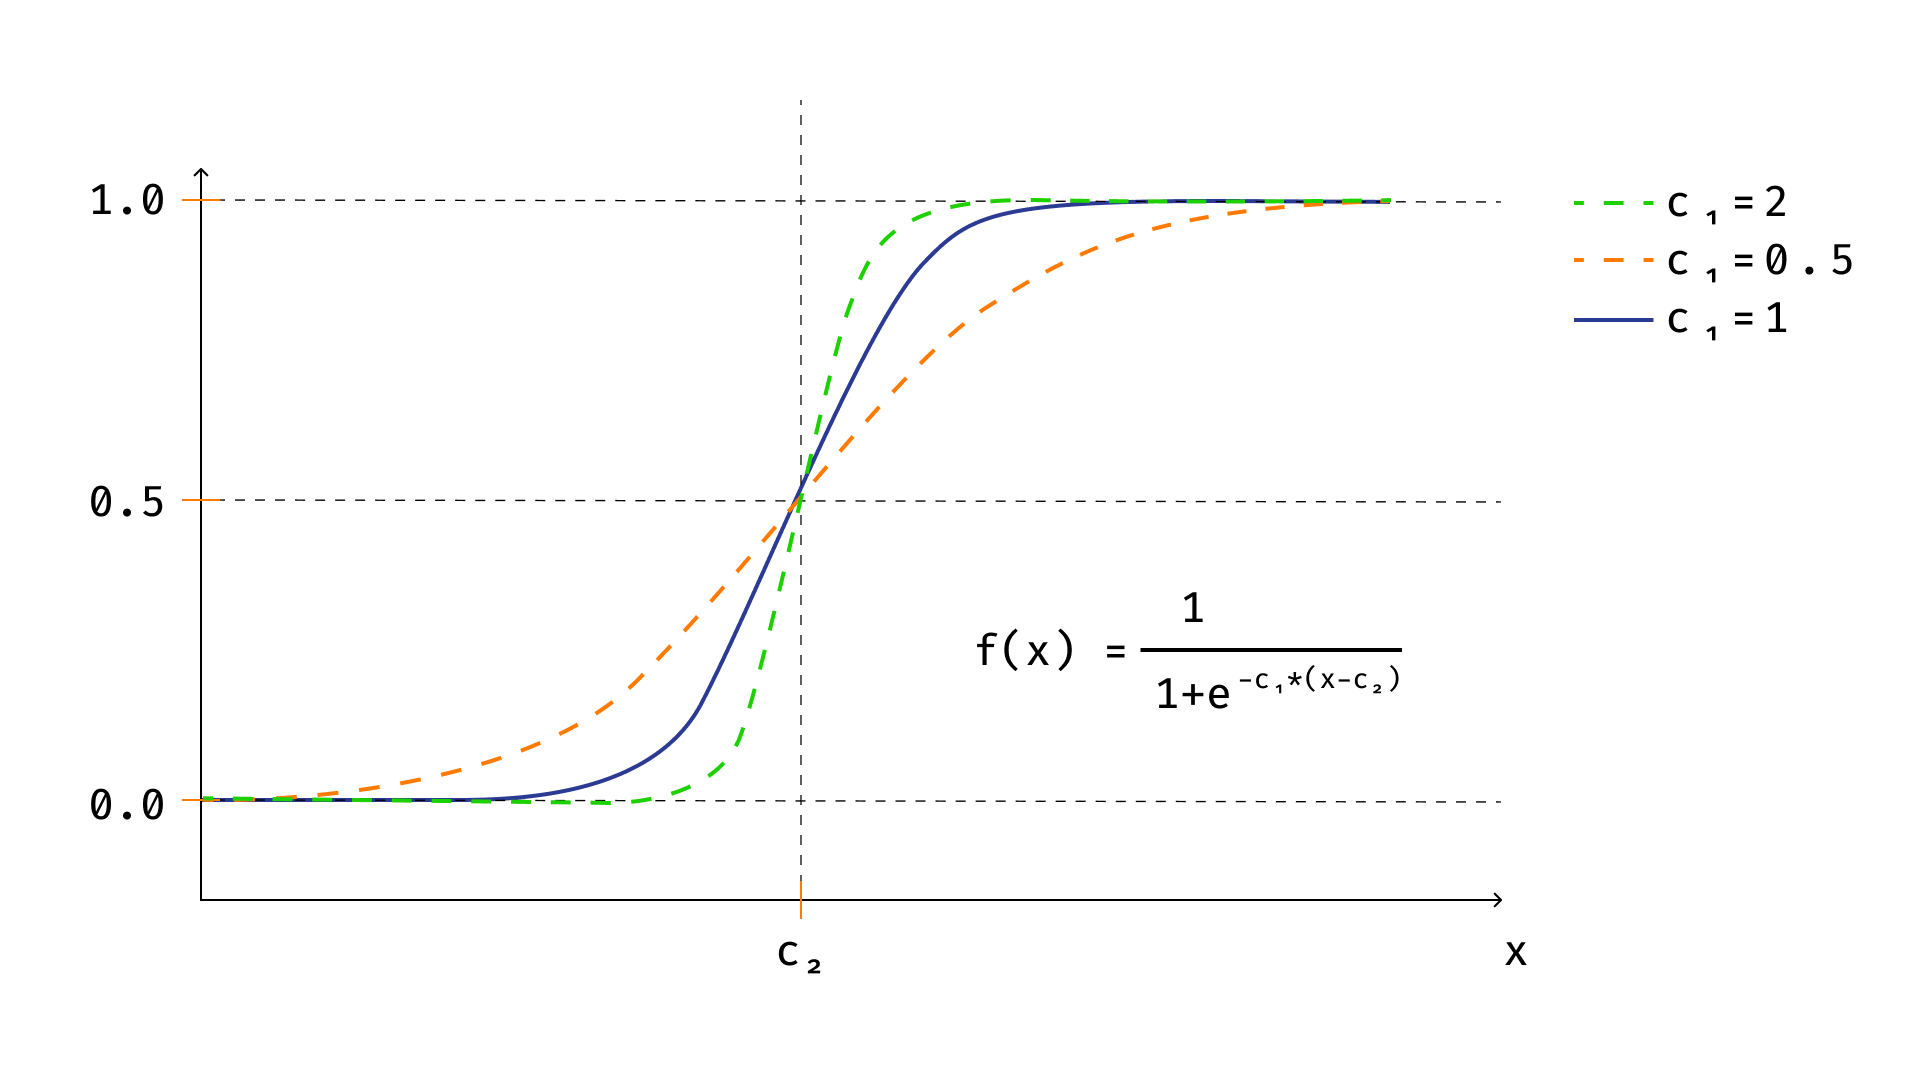



Если мы заменим пороговую функцию на сигмоидальную, математическая модель нашего нейрона превратится окончательно в модель логистической регрессии. Действительно, $$output(\vec{λ}) = σ(∑w_iλ_i)$$

В общем случае на месте сигмоиды могут стоять и некоторые другие функции. Такие функции называются **функциями активации**. Классическими примерами функции активации служат гиперболический тангенс, линейная функция, функция relu.

# XOR problem

Такой подход автоматически помогает нам решать некоторые проблемы, которые не может решить простая линейная модель.

Одна из таких проблем была обозначена в середине прошлого века и чуть было не стерла в порошок общественное мнение о машинном обучении.



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

rng = np.random.RandomState(0)
X1 = rng.randn(50, 2) + np.array([4,4])
X2 = rng.randn(50, 2) + np.array([-4,4])
X3 = rng.randn(50, 2) + np.array([4,-4])
X4 = rng.randn(50, 2) + np.array([-4,-4])
X = np.concatenate([X1,X2,X3,X4])
classes = np.sign(X[:, 0]*X[:, 1])

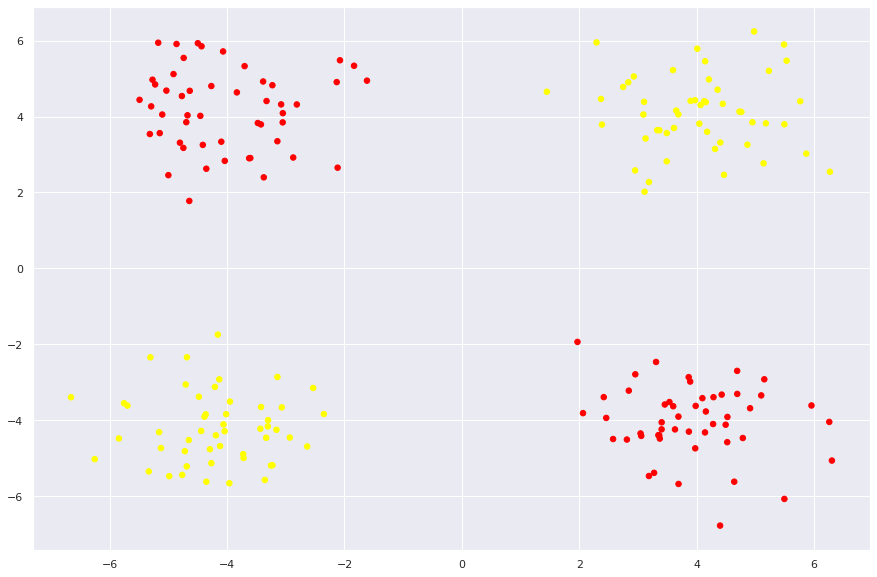

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], s=30, c=classes, cmap=plt.cm.autumn)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
def plot_gradient(clf, X, y, plot_title):
  clf.fit(X, y)

  x_mesh, y_mesh = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
  to_forecast = np.vstack((x_mesh.ravel(), y_mesh.ravel()))
  Z = clf.predict_proba(to_forecast.T)[:, 1]
  Z = Z.reshape(x_mesh.shape)

  b_left= x_mesh.min()
  b_right = x_mesh.max()
  b_down = y_mesh.min()
  b_up = y_mesh.max()

  image = plt.imshow(Z,
                     aspect='auto',
                     origin='lower',
                     cmap=plt.cm.PuOr_r,
                     interpolation='quadric',
                     extent=(b_left, b_right, b_down, b_up))

  contours = plt.contour(x_mesh, y_mesh, Z, levels=[0], linewidths=2, linetypes='--')
  plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.autumn)
  plt.axis([-8, 8, -8, 8])
  plt.colorbar(image)
  plt.title(plot_title, fontsize=20);

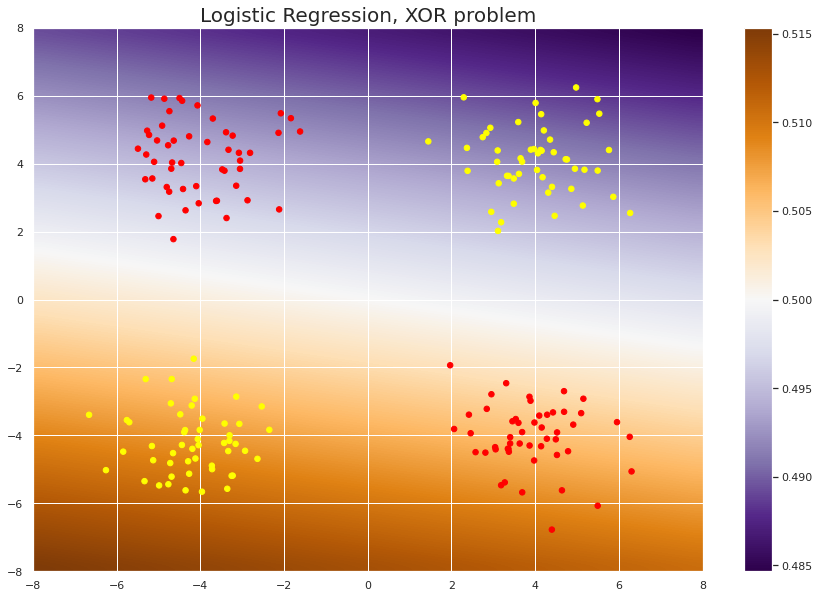

In [ ]:
from sklearn.linear_model import LogisticRegression
plt.figure(figsize=(15,10))
plot_gradient(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, classes, "Logistic Regression, XOR problem")

# Что же делать?

Попробуем объединить три логистические регрессии в следующую конструкцию:


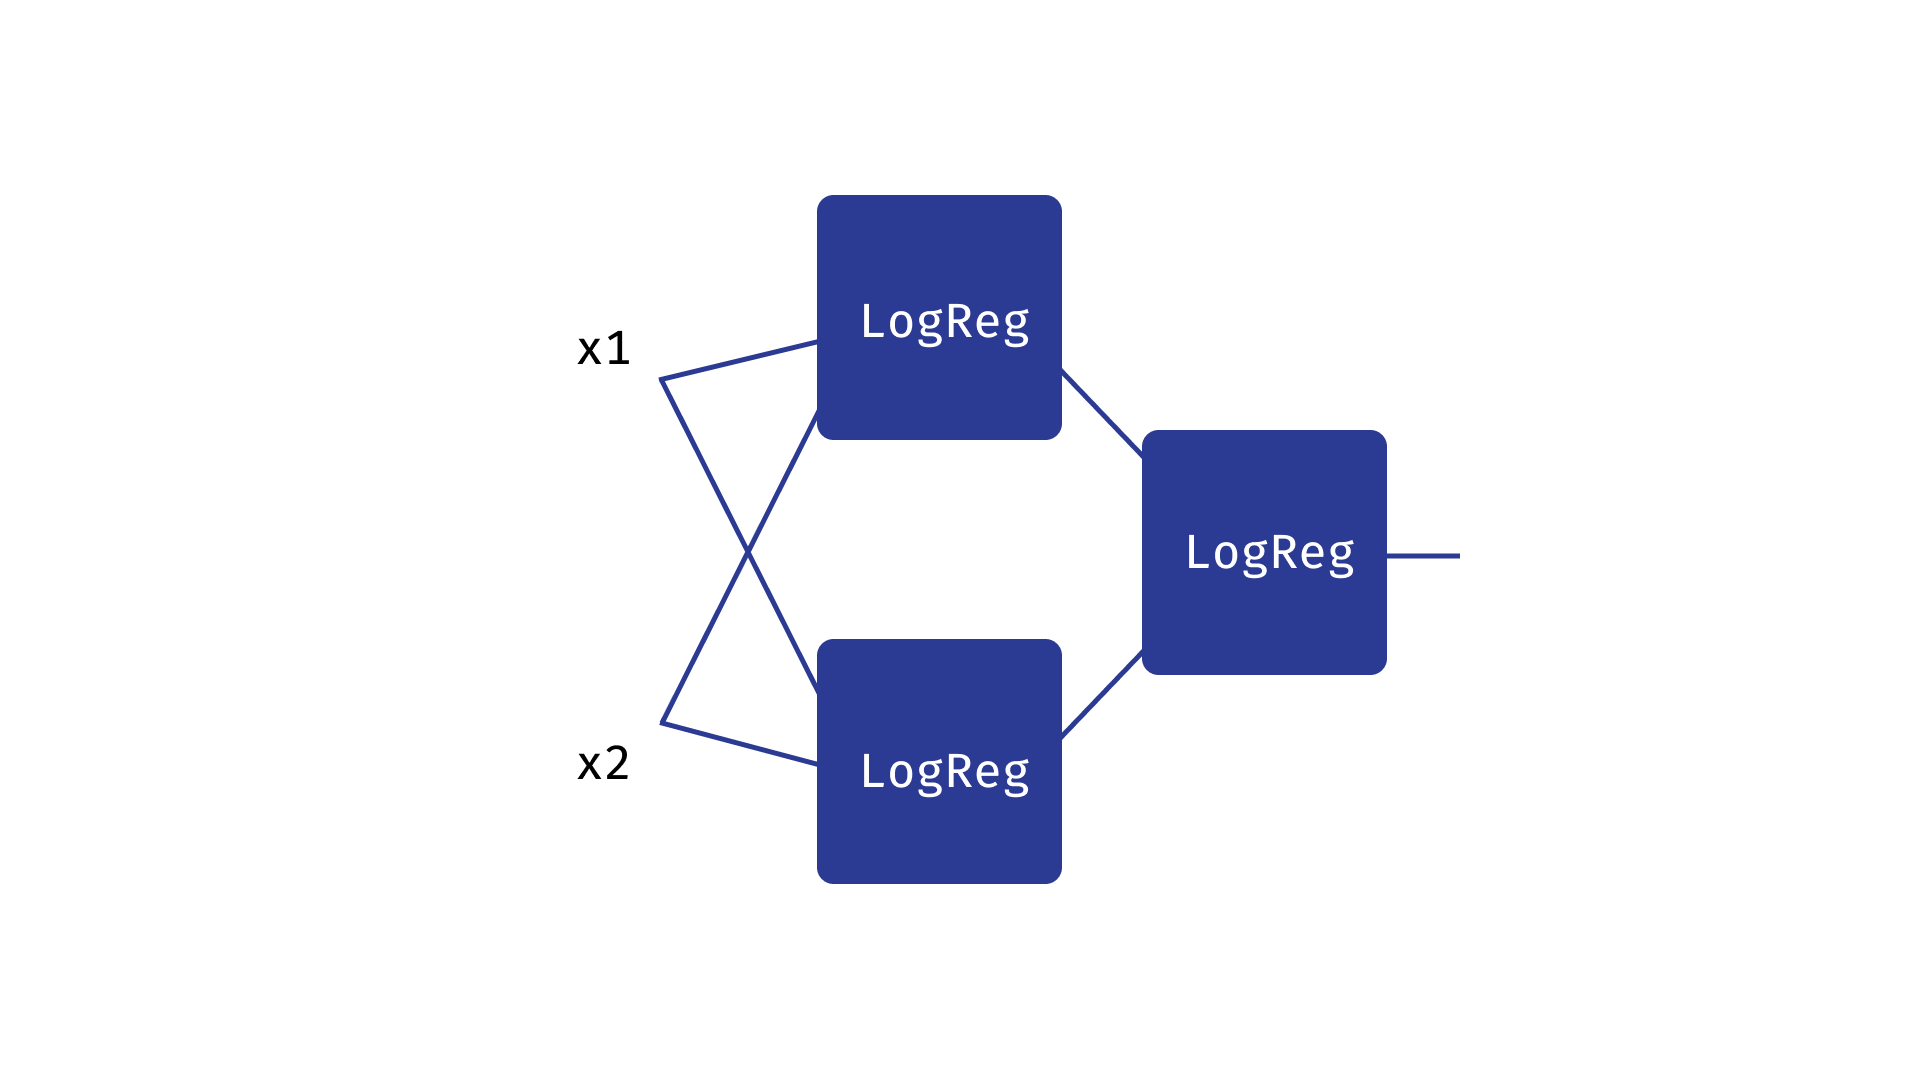



Заметим следующие детали:

1) То, что мы получили, является объединением трех логистических регрессий, которые могут извлекать высокоуровневые признаки и использовать их для окончательного предсказания, как было описано в разделе 1 этой лекции.

2) Такая структура напоминает комбинацию трех нейронов в модели Розенблатта, как в пункте 2 этой лекции.

3) Мы можем рассчитывать, что построенные на первом уровне логистические регрессии будут отвечать первичному разделению плоскости на 3 класса, в то время как окончательная логистическая регрессия объединит их предсказания воедино.

In [ ]:
class trinity_of_lr:
  def __init__(self):
    self.lr_1 = LogisticRegression()
    self.lr_2 = LogisticRegression()
    self.lr_3 = LogisticRegression()

  def fit(self, X, y):
    y_1 = (X[:,0] > 0).astype(int) * (X[:,1] < 0).astype(int)
    y_2 = (X[:,0] < 0).astype(int) * (X[:,1] > 0).astype(int)

    self.lr_1.fit(X,y_1)
    self.lr_2.fit(X,y_2)

    probas_1 = self.lr_1.predict_proba(X)
    probas_2 = self.lr_2.predict_proba(X)

    x_3 = np.concatenate([probas_1, probas_2], axis=-1)

    self.lr_3.fit(x_3,y)

  def predict(self, X):
    probas_1 = self.lr_1.predict_proba(X)
    probas_2 = self.lr_2.predict_proba(X)
    x_3 = np.concatenate([probas_1, probas_2], axis=-1)

    preds = self.lr_3.predict(x_3)
    return preds


  def predict_proba(self, X):
    probas_1 = self.lr_1.predict_proba(X)
    probas_2 = self.lr_2.predict_proba(X)
    x_3 = np.concatenate([probas_1, probas_2], axis=-1)

    preds = self.lr_3.predict_proba(x_3)
    return preds


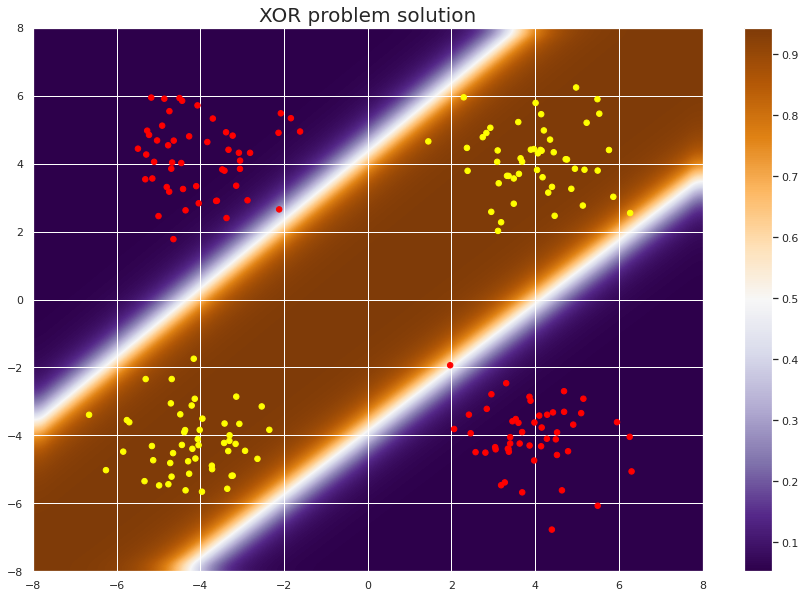

In [ ]:
plt.figure(figsize=(15,10))
plot_gradient(trinity_of_lr(), X, classes, "XOR problem solution")

# Вывод
При помощи объединения трех логистических регрессий мы добились построения более сложной разделяющей гиперповерхности, чем могли бы получить при помощи любой линейной модели.

Такая модель - это пример простейшей нейронной сети с двумя слоями.
Вообще нейронные сети бывают намного больше и углубже. Иногда количество нейронов (то есть таких логистических регрессий, либо их модификаций) достигает сотен тысяч. Количество слоёв также зачастую делают больше. Более того, существуют некоторые специальные виды нейронных сетей, по-другому организующих вычисления, но это уже совсем другая история.

Обучение нейронных сетей сводится к подбору оптимальных параметров. Обычно это делается при помощи метода градиентного спуска, который мы с вами рассматривали, когда обсуждали логистическую регрессию в третьей лекции. Один из вопросов, в котором вам предстоит разобраться, если вы решите разобраться в нейронных сетях подробнее, каким образом можно посчитать производные по параметрам внутренних слоёв нейронной сети, когда таких слоёв очень много.

# Преимущества нейронных сетей:
* Они способны "запоминать" намного более сложные (по сравнению с алгоритмами классического машинного обучения) зависимости в данных.
* Они намного более ёмкие, чем большинство алгоритмов классического ML (то есть при прочих равных содержат больше обучаемых параметров).
* Существует много разных видов нейронных сетей, каждый из которых адаптирован для решения своих специфических задач.



# "Белые пятна":
* Как обучать нейронные сети? В приведенном примере мы заранее знали, какую структуру имеют наши данные и подобрали механизм обучения, исходя из этого знания. Но что делать в общем случае?
* Какими библиотеками пользоваться для использования нейронных сетей?
* Какие виды нейронных сетей бывают?
* Какие сложности возникают при их обучении?

# Все эти вопросы будут подробно освещены в нашем курсе в следующем семестре!

Нужно отметить, что несмотря на то, что нейронные сети очень хорошо проявляют себя при решении многих сложных задач, они не представляют из себя универсальный инструмент, споосбный идеально справиться с любой сложностью. Такое ощущение возникает у многих новичков в области глубинного обучения, но это заблуждение. Есть задачи, с которыми классические методы справляются лучше нейронных сетей. Нейронные сети просто переобучаются, требуют утонченного подхода при их обучении, разбора полетов, тщательного логгирования графиков обучения, грамотной организации параллельных вычислений, а также представляют из себя неинтерпретируемые алгоритмы. Все эти недостатки очень серьезные и существенным образом усложняют работу с нейронными сетями.

# Нейронные сети могут моделировать нелинейные зависимости в данных!

Рассмотрим еще один пример задачи, в которой мы не сможем получить решение при помощи линейной модели, но нейронные сети помогут нам справиться с этой трудностью.

Попробуем смоделировать функцию косинуса!

In [ ]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt


X_train = np.random.uniform(-6,6, size=(500,1))
y_train = np.cos(X_train)

In [ ]:
X_test = np.random.uniform(-6,6, size=(100,1))
y_test = np.cos(X_test)

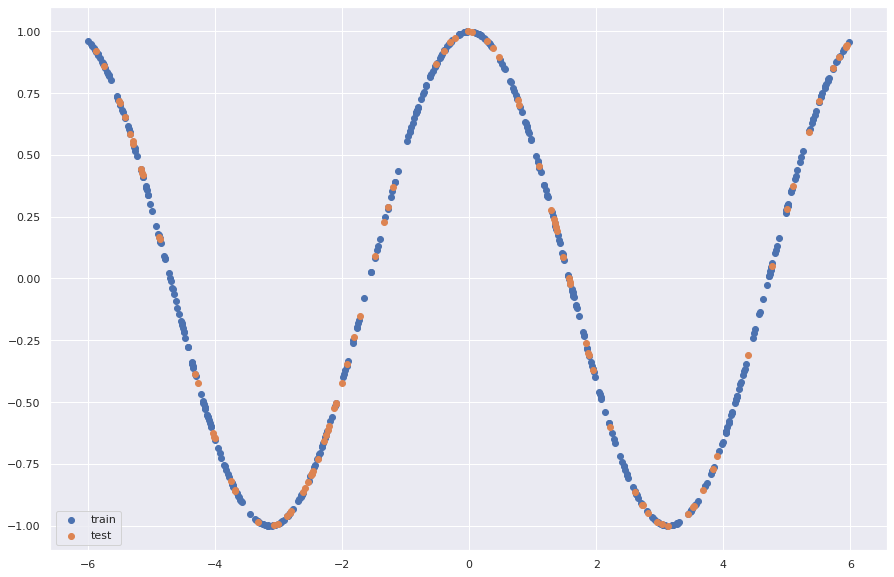

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.legend()

In [ ]:
NN = MLPRegressor(hidden_layer_sizes=[3,2], activation='relu').fit(X_train,y_train)

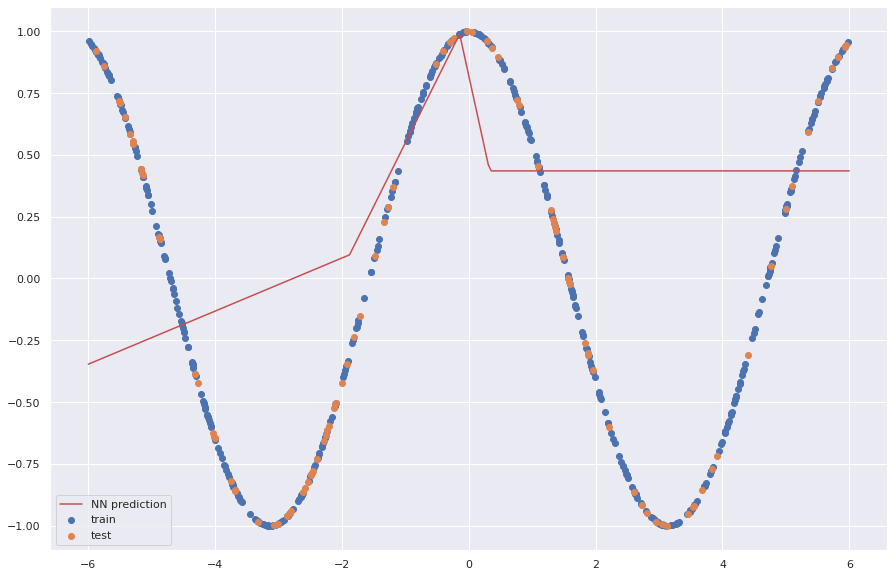

In [ ]:
grid = np.linspace(-6,6,1000)
preds = NN.predict(grid.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(grid, preds, label='NN prediction', c='r')
plt.legend()

Предсказание не очень хорошее. Почему?

Вероятно, в нашей модели слишком мало нейронов. Увеличим их число!

In [ ]:
NN = MLPRegressor(hidden_layer_sizes=[30,20], activation='relu').fit(X_train,y_train)

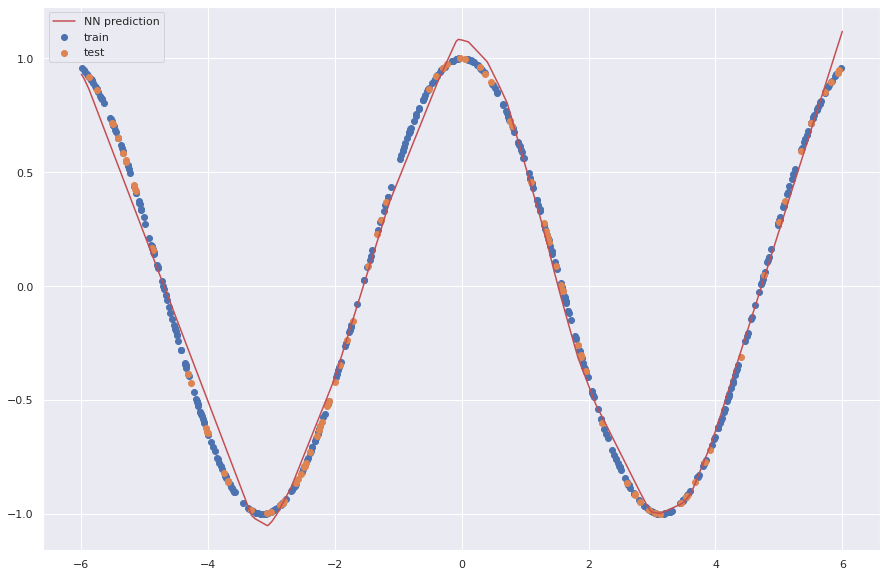

In [ ]:
preds = NN.predict(grid.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(grid, preds, label='NN prediction', c='r')
plt.legend()

Стало немного лучше. Увеличим еще!

In [ ]:
NN = MLPRegressor(hidden_layer_sizes=[1000, 200], activation='relu').fit(X_train,y_train)

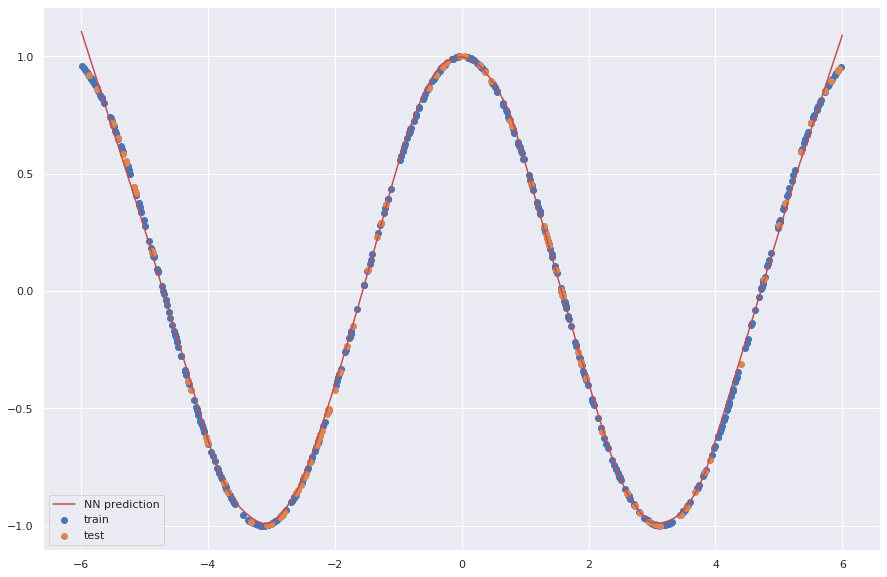

In [ ]:
preds = NN.predict(grid.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(grid, preds, label='NN prediction', c='r')
plt.legend()

Нейронная сеть довольно хорошо приближает функцию косинуса!

Важное утверждение из математики состоит в том, что любая функция может быть приближена нейросетью с одним слоем и с достаточным количеством нейронов.

Но у этого утверждения есть и свой недостаток. Утверждение говорит нам, что приближение возможно, но не говорит как его строить. Именно в решении этой сложности и состоит искусство обучения нейронных сетей (то есть в способе выбора архитектуры, подборе оптимальных гиперпараметров, числа нейронов, слоев и тд.). Мы не можем построить полносвязную нейронную сеть с одним огромным слоем, поскольку такая нейросеть будет очень сильно переобучаться.

Нейронные сети - это сложные функции с очень большим числом обучаемых параметров, которые мы должны оптимальным образом выбрать.


Вернемся к нашему примеру: Вы можете сказать, что и в классическом машинном обучении есть модели, способные эту задачу решить. Например, метрические методы регрессии

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor().fit(X_train,y_train)

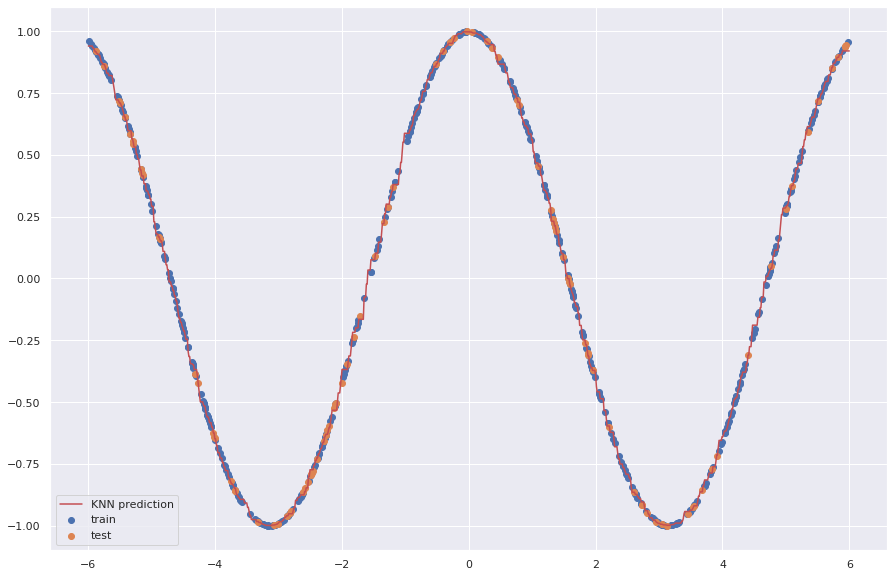

In [ ]:
preds_KNN = KNN.predict(grid.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(grid, preds_KNN, label='KNN prediction', c='r')
plt.legend()

Или решающие деревья

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train,y_train)

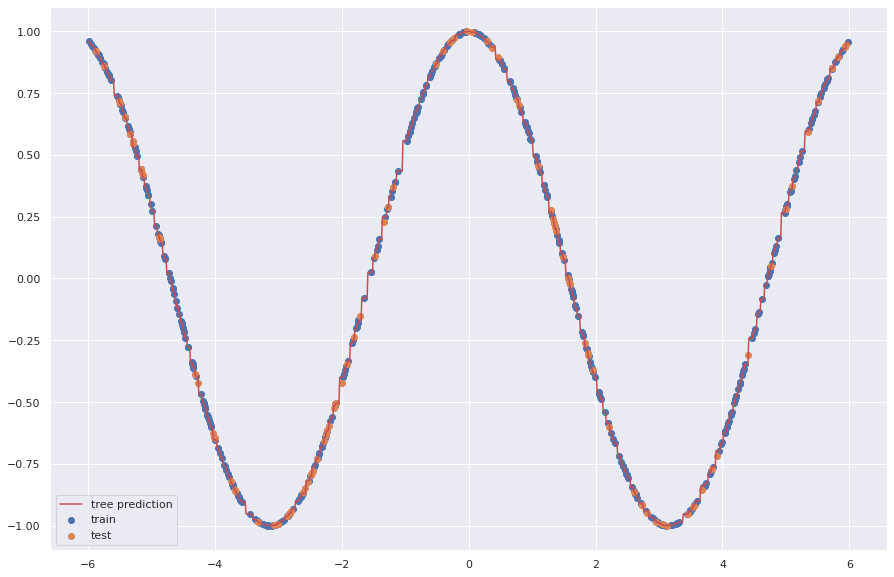

In [ ]:
preds_tree = tree.predict(grid.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(grid, preds_tree, label='tree prediction', c='r')
plt.legend()

Или даже градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost = GradientBoostingRegressor().fit(X_train,y_train)

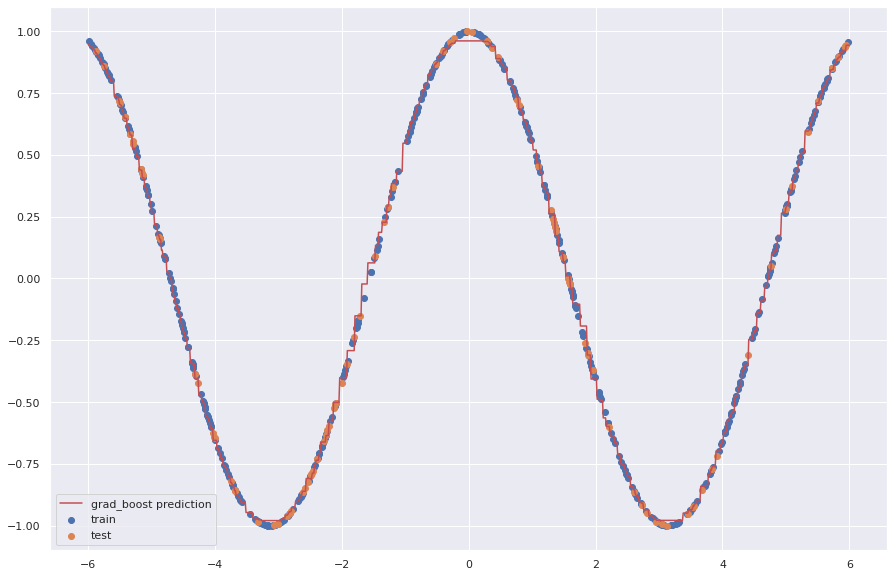

In [ ]:
preds_grad_boost = grad_boost.predict(grid.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(grid, preds_grad_boost, label='grad_boost prediction', c='r')
plt.legend()

Преимущество нейронной сети бросается в глаза, особенно если изобразить все кривые на одном графике

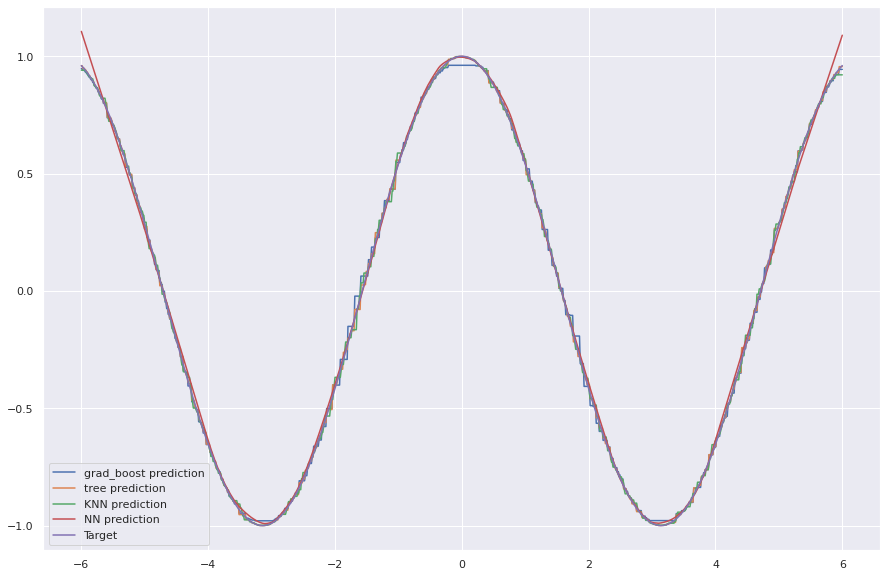

In [ ]:
plt.figure(figsize=(15,10))

cos = np.cos(grid)
plt.plot(grid, preds_grad_boost, label='grad_boost prediction')
plt.plot(grid, preds_tree, label='tree prediction')
plt.plot(grid, preds_KNN, label='KNN prediction')
plt.plot(grid, preds, label='NN prediction')
plt.plot(grid, cos, label='Target')
plt.legend()

Таким образом, нейронные сети - это принципиально новый для нас вид моделей, способных решать известные нам задачи Supervised Learning. Оказывается, решать задачи unsupervised learning нейронные сети также способны. Область науки, занимающаяся работой с нейронными сетями, называется глубинным обучением (deep learning).

Deep Learning - очень обширная область знания. Существует множество специфических методов и техник, связанных с построением и обучением нейронных сетей, а также некоторые теоретические результаты, связанные с их изучением.

Нейронные сети сегодня применяются повсеместно:

* Голосовые помощники и переводчики
* Распознавание и генерация речи
* Face ID
* Кибербезопасность
* Беспилотники
* Поиск черных дыр
* Рекомендательные системы, подборки музыки и видео
* Поиск фотографий котиков по запросу ~(=^‥^)/
* И многое-многое другое

## Дополнение*

В этом разделе мы введём более строгое и правильное определение нейронной сети. К этому моменту оно должно быть более понятным для читателя, учитывая набор приведённых выше примеров.

**Определение**. Полносвязной однослойной нейронной сетью с N нейронами мы будем называть функцию векторного аргумента $\vec{x}$ ($\vec{x}$ - вектор-столбец), параметризованную матрицей параметров $W = (w_{ij})$, имеющую следующий вид: $$NN(\vec{x}) = f(W⋅\vec{x})$$
Матрица W здесь имеет размерность $N \times dim(\vec{x})$. Функция f здесь - произвольная функция, которая называется **функцией активации**. Это называние пошло еще с тех времён, когда модель нейронной сети ассоциировалась в первую очередь с физиологической моделью восприятия, которую мы обсуждали на этой лекции. Под активацией в данном случае подразумевалась активация нейрона. Существует множество стандартных функций активации, мы будем подробно рассматривать их на следующей лекции. Примером функции активации может служить хорошо знакомая нам *сигмоида*.

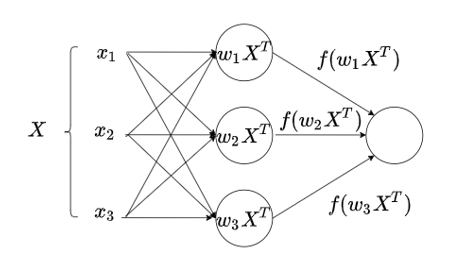

В рамках каждого из этих параллельных преобразований мы скалярно умножаем некоторый вектор весов $\vec{w}_i$ на один и тот же входной вектор $\vec{x}$, то есть полученный набор чисел имеет вид $((\vec{w}_1, \vec{x}) ... (\vec{w}_N, \vec{x}))$. Задумаемся вот над чем:  если мы запишем все векторы $\vec{w}_i$ в одну матрицу построчно, то по правилам матричного умножения $W⋅\vec{x}$ будет вектор-столбец, размерности $N × 1$. Компонента с индексом i этого выходного вектора будет представлена скалярным произведением i-й строки матрицы W на $\vec{x}$, то есть $(\vec{w}_i, \vec{x})$. Значит, чтобы получить выход представленного слоя достаточно рассмотреть набор чисел, который получается в результате матричного произведения $W⋅\vec{x}$.

На самом деле тот же самый результат можно получить в результате вычисления выражения $\vec{x}⋅W$, но лишь в том случае, когда вектор $\vec{x}$ представлен вектором-строкой, а векторы $w_i$ записаны в матрицу W не построчно, а *по столбцам*. Этот вывод очень просто получить, расписав матричное произведение покомпонентно в том и другом случае.

Остается последний шаг - применение функции активации f. То есть на выходе мы получим вектор $(f(\vec{w}_1, \vec{x}) ... f(\vec{w}_N, \vec{x}))$. Ради краткости, применение функции f отдельно к каждой компоненте такого вектора обозначают как применение функции f ко всему вектору целиком: $$(f(\vec{w}_1, \vec{x}) ... f(\vec{w}_N, \vec{x})) = f((\vec{w}_1, \vec{x}) ... (\vec{w}_N, \vec{x}))$$

В этом случае мы приходим к форме записи такого преобразования, которая была предложена в определении нейронной сети: $$NN(\vec{x}) = f((\vec{w}_1, \vec{x}) ... (\vec{w}_N, \vec{x})) = f(W⋅\vec{x})$$
_________________________________________________________

**Замечание:** В рамках такого определения мы можем получить выражение и для нескольких объектов $\vec{x}_1 ... \vec{x}_M$ одновременно. Для этого запишем эти векторы в матрицу X по столбцам и рассмотрим выражение $A = W \cdot X$. Результат этого матричного произведения будет матрицей размерности N × M. Координата $a_{ij}$ этой матрицы представляет результат скалярного произведения $(\vec{w}_i, \vec{x}_j)$, то есть результат применения i-го линейного преобразования к j-му входному вектору. То есть столбцы матрицы A представляют из себя результаты независимого применения однослойной нейронной сети к каждому из входных векторов.

**Определение**. Многослойной нейронной сетью мы назовем преобразование, представляющее из себя последовательное применение K однослойных нейронных сетей, для каждой из которых выход предыдущей воспринимается как вход последующей. Первый слой в рамках такой концепции называется входным (обычно, предполагается, что он не совершает никаких преобразований,а лишь "принимает" входной вектор), а последний - выходным. Каждая однослойная нейронная сеть называется **слоем** с N нейронами.

Например, двухслойную нейронную сеть в виде преобразования можно записать следующим образом: $$NN(X) = f_2(W_2 \cdot f_1(W_1 \cdot X))$$

Трехслойную: $$NN(X) = f_3(W_3 \cdot f_2(W_2 \cdot f_1(W_1 \cdot X)))$$

И так далее

### Пример реализации на numpy

Попробуем реализовать структуру двуслойной нейронной сети на numpy

In [ ]:
import numpy as np
# Получение выхода нейронной сети по её входу обычно называется прямым проходом.
# Реализуем его в функции форвард
def forward(W1, W2, X, f1, f2):
  z1 = np.matmul(W1, X)
  a1 = f1(z1)
  z2 = np.matmul(W2, a1)
  a2 = f2(z2)
  return a2

Теперь перед нами встаёт вопрос: как обучить нейронную сеть?
Нам необходимо подобрать оптимальные матрицы параметров $W_1$ и $W_2$ с точки зрения минимизации некоторой функции ошибки L.

Сделаем это при помощи алгоритма **градиентного спуска**

In [ ]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)


Sc = StandardScaler()
x_train = Sc.fit_transform(x_train)
x_test = Sc.transform(x_test)

# Добавим в качестве последнего стобца к X столбец единиц. Это нужно для добавления свободного слагаемого
x_train = np.c_[x_train, np.ones(x_train.shape[0])]
x_test = np.c_[x_test, np.ones(x_test.shape[0])]

In [ ]:
N_1 = 3
N_2 = 1

W1 = np.random.randn(N_1, x_train.shape[1])
W2 = np.random.randn(N_2, N_1)

def sigmoid(x):
  return 1/(1 + np.exp(-x))

f1 = sigmoid
f2 = sigmoid

forward(W1, W2, x_train[0].T, f1, f2)

(array([0.78593478]),
 (array([-2.84130069, -0.19813834,  6.08088205]),
  array([0.05513274, 0.45062684, 0.99771906]),
  array([1.30059309])))

## Алгоритм градиентного спуска в нашем случае

Мы же хотим применить алгоритм градиентного спуска к некоторой конкретной задаче. Рассмотрим, к примеру, задачу бинарной классификации.

Ответ, полученный нами, на текущий момент не имеет никакого смысла. Для обучения модели воспользуемся уже знакомой нам функцией бинарной кросс-энтропии. Эта функция задается выражением $$H(y, \hat{y}) = -\frac{1}{N}∑\limits_{i=1}^N(y_i⋅log(\hat{y_i}) + (1-y_i)log(1-\hat{y_i}))$$

Где $y_i$ - это верный ответ, а $\hat{y_i}$ - Это гипотеза нашего алгоритма, представленная вероятностью отнести объект $x_i$ к классу 1.

In [ ]:
def BCE(y_pred, y_true):
    m = y_true.shape[0]
    loss = -1 / m * (np.dot(y_true, np.log(y_pred).T) + np.dot(1 - y_true, np.log(1 - y_pred).T))
    return np.squeeze(loss)

def uni_BCE(y_pred, y_true):
  return -(y_true*np.log(y_pred) + (1 - y_true)*np.log(1 - y_pred))

Итак, наша задача теперь - посчитать градиент функции H по параметрам модели NN, если мы знаем, что $\hat{y_i} = a_2 = NN(\vec{x}_i) = σ(W_2⋅σ(W_1⋅\vec{x}_i))$

Пользуясь введёнными ранее обозначениями, $$\vec{z}_1 = W_1 ⋅ \vec{x}_i$$
$$\vec{a}_1 = σ(\vec{z}_1)$$
$$\vec{z}_2 = W_2 ⋅ \vec{a}_1$$
$$a_2 = σ(\vec{z}_2)$$
Где все векторы представлены столбцами. В нашем случае $a_2(\vec{x}_i) = \hat{y}_i$ и это скаляр.

Распишем покомпонентно:

$$(z_1)_i = ω_{i1}^1x_1 + ... + ω_{iK}^1x_K$$
Где K - размерность вектора $\vec{x}$, а $ω_{ij}^1$ - это компоненты матрицы $W_1$. Всего вектор $\vec{z}_1$ содержит L компонент, где L - число нейронов первого слоя.

Далее, в нашем случае $$z_2 = W_2 ⋅ a_1 = ω_{1}^2a_1^1 + ... + ω_{L}^2a_L^1$$
$$a_2 = σ(z_2)$$

Тогда $$\frac{∂H}{∂ω_i^2} = \frac{∂ H}{∂a_2}\frac{∂a_2}{∂ω_i^2}$$
$$\frac{∂H}{∂a_2} = -\frac{1}{N}∑\limits_{i=1}^Ny_i⋅\frac{1}{a_{2}(\vec{x}_i)} - (1 - y_i)\frac{1}{1 - a_{2}(\vec{x}_i)}$$

Если мы рассматриваем производную всего для одного объекта x:
$$\frac{∂H}{∂a_2} = -(y⋅\frac{1}{a_{2}} - (1 - y)\frac{1}{1 - a_{2}})$$
Вычислим $\frac{∂a_2}{∂ω_i^2}$:
$$\frac{∂a_2}{∂ω_i^2} = \frac{\partial σ(\vec{z}_2)}{∂ω_i^2} = σ(\vec{z}_2)(1 - σ(\vec{z}_2))\frac{∂\vec{z}_2}{∂ω_i^2} = a_2(1 - a_2)a_i^1$$
Здесь мы воспользовались известным свойством сигмоидальной функции: $σ' = σ(1 - σ)$

Итак, мы выразили производные по параметрам второго слоя через значения активаций $\vec{a}_1$ и $a_2$. Отсюда следует важный вывод: эти значения необходимо *кэшировать* в процессе вычисления предсказания для объекта. Производная по параметрам второго слоя в итоге принимает вид:

$$\frac{∂H}{∂ω_i^2} = - (a_2(1 - a_2)a_i^1(y⋅\frac{1}{a_{2}} - (1 - y)\frac{1}{1 - a_{2}})) = -α_i^1((1 - α_2)y - α_2(1 - y))$$

**Теперь найдем производную по параметрам первого слоя**
$$\frac{∂H}{∂ω_{ij}^1} = \frac{∂H}{∂ z_2}(\frac{∂ z_2}{∂ z_1^1}\frac{∂ z_1^1}{∂ ω_{ij}^1} + ... +  \frac{∂ z_2}{∂ z_L^1}\frac{∂ z_L^1}{∂ ω_{ij}^1})$$

В свою очередь:

$$\frac{∂ z_2}{∂ z_k^1} = \omega_k^2a_k^1(1 - a_k^1)$$
И
$$\frac{∂ z_k^1}{∂ ω_{ij}^1} = 0, k \neq i$$
$$\frac{∂ z_k^1}{∂ ω_{ij}^1} = x_j, k = i$$

Тогда:
$$\frac{∂H}{∂ω_{ij}^1} = \frac{∂H}{∂ z_2}\frac{∂ z_2}{∂ z_i^1}\frac{∂ z_i^1}{∂ ω_{ij}^1} = \frac{∂H}{∂ z_2}\omega_i^2a_i^1(1 - a_i^1)x_j = -a_2(1-a_2)(y⋅\frac{1}{a_{2}} - (1 - y)\frac{1}{1 - a_{2}})\omega_i^2a_i^1(1 - a_i^1)x_j$$

Таким образом, мы нашли производную функции потерь по параметрам обоих слоёв нашей двухслойной нейронной сети.

На этом моменте у тех из вас, кто сумел дочитать до этой строчки, наверняка возникнет вопрос - неужели, все эти вычисления нужно производить при конструировании каждой нейронной сети для каждой отдельной задачи?...

Ответ на этот вопрос - конечно же, нет. Иначе человечество не обучило бы ни одной нейронной сети глубжет 2 слоёв, а их иногда насчитываются сотни тысяч. Существует специальный алгоритм, позволяющий быстро считать производные по параметрам каждого слоя. Этот алгоритм называется backpropagation, или алгоритм *обратного распространения ошибки*. Его мы с вами подробно обсудим на следующей лекции. Между прочим, для тех из вас, кто осилил вышеизложенные выкладки, этот алгоритм наверняка будет прост и понятен.

Теперь мы имеем прекрасную возможность реализовать все эти выкладки в коде.

In [ ]:
# Требуется переписать forward так, чтобы получить еще и кэшированные значения активаций и предактиваций
def forward(W1, W2, X, f1, f2):
  z1 = np.matmul(W1, X)
  a1 = f1(z1)
  z2 = np.matmul(W2, a1)
  a2 = f2(z2)
  return a2, (z1, a1, z2)

In [ ]:
def grad_w2(a1: np.array, a2: float, y: int):
  L = a1.shape[0]
  dH = y*(1/a2) - (1 - y)*(1/(1 - a2))
  grad = a1.copy()
  grad = -dH*a2*(1 - a2)*grad
  return grad

def grad_w1(a1: np.array, a2: float, x: np.array, W2: np.array, y: int):
  dH = (y*(1/a2) - (1 - y)*(1/(1 - a2)))*a2*(1 - a2)
  mult = a1*(1 - a1)

  w2 = np.squeeze(W2)
  grad = np.zeros((w2.shape[0], x.shape[0]))
  for i in range(w2.shape[0]):
    for j in range(x.shape[0]):
      grad[i][j] = -mult[i]*dH*w2[i]*x[j]

  return grad

In [ ]:
def train(W1, W2, X, y, num_epoch, learning_rate):
  for epo in range(num_epoch):
    epo_loss = []
    for i, x in enumerate(X):
      ans, cache = forward(W1, W2, x.T, sigmoid, sigmoid)
      z1, a1, z2 = cache
      grad_W1 = grad_w1(a1, ans, x, W2, y[i])
      grad_W2 = grad_w2(a1, ans, y[i])

      W1 = W1 - learning_rate*grad_W1
      W2 = W2 - learning_rate*grad_W2

      loss_ = uni_BCE(ans[0], y[i])

      epo_loss.append(loss_)
    print(f'Epoch {epo}. Loss: {np.mean(epo_loss)}')
  return W1, W2

In [ ]:
W1, W2 = train(W1, W2, x_train, y_train, 120, 1e-3)

Epoch 0. Loss: 0.5686532550723382
Epoch 1. Loss: 0.5439968096532588
Epoch 2. Loss: 0.522953263237478
Epoch 3. Loss: 0.5045336348581259
Epoch 4. Loss: 0.4881116067521189
Epoch 5. Loss: 0.4732822886888227
Epoch 6. Loss: 0.4597661994794963
Epoch 7. Loss: 0.44735860960673407
Epoch 8. Loss: 0.4359029871905569
Epoch 9. Loss: 0.42527421402130233
Epoch 10. Loss: 0.4153671674359974
Epoch 11. Loss: 0.406090026907499
Epoch 12. Loss: 0.39736136986892645
Epoch 13. Loss: 0.38910944503207306
Epoch 14. Loss: 0.3812721698443673
Epoch 15. Loss: 0.3737970056406738
Epoch 16. Loss: 0.366640411549615
Epoch 17. Loss: 0.359766898806982
Epoch 18. Loss: 0.353147846605459
Epoch 19. Loss: 0.34676028196450065
Epoch 20. Loss: 0.3405858176728175
Epoch 21. Loss: 0.3346098979505686
Epoch 22. Loss: 0.32882141877209625
Epoch 23. Loss: 0.32321266413735095
Epoch 24. Loss: 0.31777934138959674
Epoch 25. Loss: 0.3125203649416646
Epoch 26. Loss: 0.30743704873456495
Epoch 27. Loss: 0.30253163231343866
Epoch 28. Loss: 0.2978055

In [ ]:
y_pred, _ = forward(W1, W2, x_test.T, sigmoid, sigmoid)
y_pred = y_pred.reshape(-1)

pred = (y_pred>0.5).astype(int)

from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.973404255319149

Мы получили очень хорошее качество благодаря двухслойной нейронной сети!